In [172]:
import numpy as np
import math
from scipy import signal

# data = np.array(list(map(lambda x: math.sin(x / 40), range(0, 200))))

time=np.arange(0,1,0.001)
freq=3
data=np.abs(signal.sawtooth(2 * np.pi * freq * time)) - 0.5

data

array([ 0.5  ,  0.494,  0.488,  0.482,  0.476,  0.47 ,  0.464,  0.458,
        0.452,  0.446,  0.44 ,  0.434,  0.428,  0.422,  0.416,  0.41 ,
        0.404,  0.398,  0.392,  0.386,  0.38 ,  0.374,  0.368,  0.362,
        0.356,  0.35 ,  0.344,  0.338,  0.332,  0.326,  0.32 ,  0.314,
        0.308,  0.302,  0.296,  0.29 ,  0.284,  0.278,  0.272,  0.266,
        0.26 ,  0.254,  0.248,  0.242,  0.236,  0.23 ,  0.224,  0.218,
        0.212,  0.206,  0.2  ,  0.194,  0.188,  0.182,  0.176,  0.17 ,
        0.164,  0.158,  0.152,  0.146,  0.14 ,  0.134,  0.128,  0.122,
        0.116,  0.11 ,  0.104,  0.098,  0.092,  0.086,  0.08 ,  0.074,
        0.068,  0.062,  0.056,  0.05 ,  0.044,  0.038,  0.032,  0.026,
        0.02 ,  0.014,  0.008,  0.002, -0.004, -0.01 , -0.016, -0.022,
       -0.028, -0.034, -0.04 , -0.046, -0.052, -0.058, -0.064, -0.07 ,
       -0.076, -0.082, -0.088, -0.094, -0.1  , -0.106, -0.112, -0.118,
       -0.124, -0.13 , -0.136, -0.142, -0.148, -0.154, -0.16 , -0.166,
      

In [173]:
def make_windows(X, y, n_window_points):
    X_index = X.index
    index = 0
    
    res_X = []
    res_y = []

    for index in range(0, len(X) - n_window_points - 1):
        res_X.append(X.iloc[index:(index + n_window_points)])
        res_y.append(y.iloc[index + n_window_points])

    return (np.array(res_X), np.array(res_y))

In [174]:
N_WINDOW_POINTS = 6

In [175]:
import pandas as pd

(X, y) = make_windows(pd.Series(data), pd.Series(data), N_WINDOW_POINTS)

In [176]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Reshape, GRU
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [177]:
# from keras import optimizers

# N_WINDOW_POINTS = 6
# BATCH_SIZE = 1
# N_UNITS = 3


# model = Sequential()

# model.add(Reshape((N_WINDOW_POINTS, 1), batch_input_shape=(BATCH_SIZE, N_WINDOW_POINTS)))
    
# model.add(GRU(N_UNITS,
#           input_shape=(N_WINDOW_POINTS, 1),
#           # batch_input_shape=(BATCH_SIZE, 1),
#           stateful=True,
#           # reset_after=True,
#           recurrent_activation='sigmoid'))
#           # return_sequences=True))

# # model.add(LSTM(10,
# #           input_shape=(1, 1),
# #           stateful=True,
# #           unit_forget_bias=True))
# #           # return_sequences=True))

# # model.add(Dropout(1, 0.2))

# # model.add(LSTM(24,
# #           input_shape=(None, 1),
# #           stateful=True))

# model.add(Dense(1, activation=None))

# adam = optimizers.Adam(lr=0.1)


# model.compile(loss='mse', optimizer=adam)

In [178]:
N_UNITS = 10
n_steps = N_WINDOW_POINTS
n_features = 1

model = Sequential()
# model.add(LSTM(
#      10,
#      activation='relu',
#      stateful=True,
#      reset_after=True,
#      input_shape=(n_steps, n_features),
#      batch_input_shape=(1, n_steps, 1)
# ))

model.add(GRU(N_UNITS,
          input_shape=(N_WINDOW_POINTS, n_features),
          # batch_input_shape=(BATCH_SIZE, 1),
          stateful=True,
          # reset_after=True,
          recurrent_activation='sigmoid',
          batch_input_shape=(1, n_steps, 1)
))
          # return_sequences=True))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [179]:
print(X.shape)

(993, 6)


In [180]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X[0]

array([[0.5  ],
       [0.494],
       [0.488],
       [0.482],
       [0.476],
       [0.47 ]])

In [181]:
model.fit(X[:190], y[:190], epochs=10, batch_size=1)

Epoch 1/10
190/190 [==============================] - 3s 15ms/step - loss: 0.0062
Epoch 2/10
190/190 [==============================] - 1s 3ms/step - loss: 9.0993e-05
Epoch 3/10
190/190 [==============================] - 1s 3ms/step - loss: 6.8643e-05
Epoch 4/10
190/190 [==============================] - 1s 3ms/step - loss: 6.5715e-05
Epoch 5/10
190/190 [==============================] - 1s 3ms/step - loss: 6.2865e-05
Epoch 6/10
190/190 [==============================] - 1s 3ms/step - loss: 7.8252e-05
Epoch 7/10
190/190 [==============================] - 1s 3ms/step - loss: 7.6616e-05
Epoch 8/10
190/190 [==============================] - 1s 3ms/step - loss: 8.3048e-05
Epoch 9/10
190/190 [==============================] - 1s 3ms/step - loss: 6.5842e-05
Epoch 10/10
190/190 [==============================] - 1s 3ms/step - loss: 6.4477e-05


In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (1, 10)                   360       
_________________________________________________________________
dense_24 (Dense)             (1, 1)                    11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [183]:
x_input = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.45595512]]


In [186]:
x_input = np.flip(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]))
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.21442367]]


Text(0, 0.5, 'value')

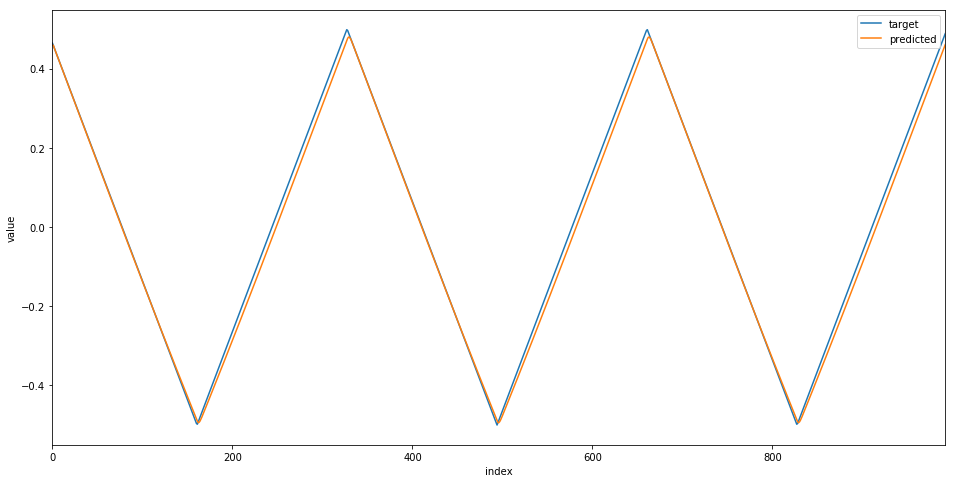

In [187]:
from matplotlib import pyplot as plt

from scipy.signal import savgol_filter

(fig, ax) = plt.subplots(figsize=(16, 8))

I = 100

(pd.Series(y)).plot.line(ax=ax, label='target')

# pd.Series(normalize(np.array(list(map(lambda w: w[-1], X_tr_f[:I]))))).plot.line(ax=ax, label='feature')
pred = pd.Series(model.predict(X, batch_size=1).flatten())

pred.plot.line(label='predicted')


# pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')

ax.legend(loc="upper right")
ax.set_xlabel('index')
ax.set_ylabel('value')

In [147]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]
 [60 70 80]]
[[102.737236]]
